In [6]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

# 表記

- $P(X, Y)$: 同時確率 (joint probability)
- $P(X | Y)$: 条件付き確率 (conditional probability)

# 用語

- 目的変数 (target variable): 予測したい変数で、関数の出力となる。従属変数とも言う。

# 確率論

## 加法定理 (sum rule)

$p(X) = \sum_Y p(X, Y)$

$p(X)$は他の変数(Y)についての周辺化なので**周辺確率** (marginal probability)とも呼ばれる。

連続変数では、

$p(x) = \int p(x, y)dy$

## 乗法定理 (product rule)

$p(X, Y) = P(Y | X)P(X)$

連続変数では、

$p(x, y) = p(y | x)p(x)$

## ベイズの定理 (Bayes's theorem)

$P(Y | X) = \frac{P(X | Y)P(Y)}{P(X)}$

<p style="margin-left: 120px; font-size: 12px;">
$P(X, Y) = P(Y, X)$より、<br>

$P(Y | X){P(X)} = P(X | Y)P(Y)$<br>

$P(Y | X) = \frac{P(X | Y)P(Y)}{P(X)}$
</p>

加法定理と乗法定理を使えば分母は分子に現れる量で表せる。

$P(Y | X) = \frac{P(X | Y)P(Y)}{\sum_Y P(X | Y)P(Y)}$


## 多変数のときのベイズの定理

N個のデータ$X_1 \dots X_N$を観測したあとの事後確率$P(Y|X_{N}, \dots, X_{1})$は、N-1個のデータを観測したあとの事後確率$P(Y| X_{N-1}\dots X_1)$と尤度関数$P(X_{N}|Y, X_{N-1} \dots X_1)$に比例する。

$P(Y|X_{N}, \dots, X_{1}) = \frac{P(X_{N}|Y, X_{N-1} \dots X_1)P(Y| X_{N-1}\dots X_1)}{P(X_{N}|X_{N-1}\dots X_1)}$

副次的に得られる式として、

$P(Y|X_{N}, \dots, X_{1}) = \frac{P(Y, X_{N}, \dots, X_1)}{P(X_{N}, \dots, X_1)}$


<p style="margin-left: 120px; font-size: 12px;">

N=3のときを考える。<br>

$P(Y, X_3, X_2, X_1)$<br>

$ = P(Y, X_3, X_2| X_1)P(X_1)$<br>

$ = P(Y, X_3| X_2, X_1)P(X_2| X_1)p(X_1)$<br>

$ = P(Y |X_3, X_2 X_1)P(X_3| X_2 X_1)P(X_2| X_1)P(X_1)$<br>

$ X_3, Y $を入れ替えても等価なので、<br>

$p(Y, X_3, X_2, X_1) = P(X_3 |Y, X_2 X_1)P(Y| X_2 X_1)P(X_2| X_1)P(X_1)$<br>

よって、<br>

$P(Y |X_3, X_2 X_1) = \frac{P(X_3 |Y, X_2 X_1)P(Y| X_2 X_1)P(X_2| X_1)P(X_1)}{P(X_3| X_2 X_1)P(X_2| X_1)P(X_1)}$<br>

$ = \frac{P(X_3 |Y, X_2 X_1)P(Y| X_2 X_1)}{P(X_3| X_2 X_1)}$

</p>

## 確率密度 (probability density)

連続変数xが区間$(x, x + \delta x)$に入る確率が$\delta \to 0$のとき$p(x)\delta x$で与えられるとき、p(x)をx上の**確率密度**あるいは確率密度分布 (probability density distribution)という。

xが区間(a, b)にある確率は

$p(x \in (a, b)) = \int_a^b p(x)dx$

確率密度は以下の性質を満たす。

$p(x) \ge 0$

$\int_{-\infty}^{\infty}p(x)dx = 1$



## 累積分布関数 (cumulative distribution function)

xが区間$(-\infty, z)$に入る確率を**累積分布関数**という。

$P(z) = \int_{-\infty}^zp(x)dx$

累積分布関数の微分は確率密度となる。

$P'(x) = p(x)$

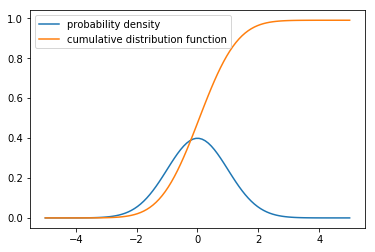

In [21]:
delta = (5 - (-5)) / 100
x = np.linspace(-5, 5, 100)
y = stats.norm.pdf(x, 0, 1)
cd = [sum(y[:i])*delta for i in range(len(x))]

plt.plot(x, y, label="probability density")
plt.plot(x, cd, label="cumulative distribution function")
plt.legend(loc="upper left")

## 期待値 (expectation)

ある関数$f(x)$の確率分布$p(x)$の下での平均値を$f(x)$の期待値といい、$\mathbb{E}[f]$と表記する。

離散分布では、

$\mathbb{E}[f] = \sum_x p(x)f(x)$

連続変数の場合、確率密度に関する積分となる。

$\mathbb{E}[f] = \int_{-\infty}^\infty p(x)f(x)dx$

期待値には以下の性質がある。ここでa, bは定数であり確率変数ではない。

- $\mathbb{E}[b] = b$
- $\mathbb{E}[x + b] = \mathbb{E}[x] + b$
- $\mathbb{E}[ax] = a\mathbb{E}[x]$
- $\mathbb{E}[ax + b] = a\mathbb{E}[x] + b$
- $\mathbb{E}[x + y] = \mathbb{E}[x] + \mathbb{E}[y]$

<p style="margin-left: 120px; font-size: 12px;">

$\mathbb{E}[x + z] = \iint p(x, z)(x + z)dxdz$<br>

$ = \iint p(x, z)x + p(x, z)zdxdz$<br>

$ = \int x\int p(x, z)dzdx +\int z\int p(x, z)dxdz$<br>

$ = \int xp(x)dx +\int zp(z)dz$<br>

$ = \mathbb{E}[x] + \mathbb{E}[z]$

</p>

- $\mathbb{E}[x] = \mathbb{E}_y[\mathbb{E}_x[x|y]]$

<p style="margin-left: 120px; font-size: 12px;">

$\mathbb{E}_y[\mathbb{E}_x[x|y]] = \int p(y)\mathbb{E}_x[x|y]dy$<br>

$ = \int p(y)\int xp(x|y)dxdy$<br>

$ = \int p(y)\int x\frac{p(x,y)}{p(y)}dxdy$<br>

$ = \int \frac{p(y)}{p(y)}\int xp(x,y)dxdy$<br>

$ = \int x\int p(x,y)dydx$<br>

$ = \int xp(x)dx$<br>

$ = \mathbb{E}[x]$

</p>

## 分散 (variance)

$f(x)$の分散を平均値の周りでのばらつきの尺度として以下のように定義する。

$\mathrm{var}[f] = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2]$

これは以下のように展開できる。

$\mathrm{var}[f] = \mathbb{E}[f(x)^2] - \mathbb{E}[f(x)]^2$

<p style="margin-left: 120px; font-size: 12px;">
$\mathrm{var}[f] = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2]$<br>

$ = \mathbb{E}[f(x)^2 -2f(x)\mathbb{E}[f(x)] + \mathbb{E}[f(x)]^2]$<br>

以下期待値の性質を使って展開していく。<br>

$ = \mathbb{E}[f(x)^2] + \mathbb{E}[-2f(x)\mathbb{E}[f(x)]] + \mathbb{E}[\mathbb{E}[f(x)]^2]$<br>

$\mathbb{E}[f(x)], \mathbb{E}[f(x)]^2$は定数なので、<br>

$ = \mathbb{E}[f(x)^2] - 2\mathbb{E}[f(x)]\mathbb{E}[f(x)] + \mathbb{E}[f(x)]^2$<br>

$ = \mathbb{E}[f(x)^2] - \mathbb{E}[f(x)]^2$
</p>

分散には以下の性質がある。ここでa, bは定数であり確率変数ではない。

- $\mathrm{var}[b] = 0$
- $\mathrm{var}[x + b] = \mathrm{var}[x]$
- $\mathrm{var}[ax] = a^2\mathrm{var}[x]$
- $\mathrm{var}[ax + b] = a^2\mathrm{var}[x]$
- $\mathrm{var}[x] = \mathbb{E}_y[\mathrm{var}_x[x|y]] + \mathrm{var}_y[\mathbb{E}_x[x|y]]$

<p style="margin-left: 120px; font-size: 12px;">

$\mathbb{E}_y[\mathrm{var}_x[x|y]] = \int p(y)\mathrm{var}_x[x|y]dy$<br>

$ = \int p(y)\left(\mathbb{E}_x[x^2|y] - \mathbb{E}_x[x|y]^2\right)dy$<br>

$ = \int p(y)\mathbb{E}_x[x^2|y]dy - \int p(y)\mathbb{E}_x[x|y]^2dy$<br>

$ = \int p(y)\int p(x|y)x^2dxdy - \mathbb{E}_y[\mathbb{E}_x[x|y]^2]$<br>

$ = \iint p(x|y)p(y)x^2 dxdy - \mathbb{E}_y[\mathbb{E}_x[x|y]^2]$<br>

$ = \int x^2\int p(x, y)dy dx - \mathbb{E}_y[\mathbb{E}_x[x|y]^2]$<br>

$ = \int x^2p(x)dx - \mathbb{E}_y[\mathbb{E}_x[x|y]^2]$<br>

$ = \mathbb{E}[x^2] - \mathbb{E}_y[\mathbb{E}_x[x|y]^2]$<br>

また、<br>

$\mathrm{var}_y[\mathbb{E}_x[x|y]] = \mathbb{E}_y[\mathbb{E}_x[x|y]^2] - \mathbb{E}_y[\mathbb{E}_x[x|y]]^2$<br>

$ = \mathbb{E}_y[\mathbb{E}_x[x|y]^2] - \mathbb{E}[x]^2$<br>

よって、<br>

$\mathbb{E}_y[\mathrm{var}_x[x|y]] + \mathrm{var}_y[\mathbb{E}_x[x|y]] = \mathbb{E}[x^2] - \mathbb{E}_y[\mathbb{E}_x[x|y]^2] + \mathbb{E}_y[\mathbb{E}_x[x|y]^2] - \mathbb{E}[x]^2$<br>

$ = \mathbb{E}[x^2] - \mathbb{E}[x]^2$<br>

$ = \mathrm{var}[x]$

</p>

## 大数の法則 (law of large numbers)

確率分布から得られた確率変数の平均は、その分布の期待値に収束する。

$\frac{1}{N}\sum_{n=1}^{N}f(x_n) \to \mathbb{E}[f], N \to \infty$

分散もまた期待値なので、上記の方法で近似した期待値$\mu$を用いて同様の近似が成り立つ。

$\frac{1}{N}\sum_{n=1}^{N}(f(x_n) - \mu)^2 \to \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2] = \mathrm{var}[f], N \to \infty$

## 共分散 (covariance)

2つの確率変数xとyの**共分散**はxとyが同時に変動する度合いを表し、以下のように定義される。

$\mathrm{cov}[x, y] = \mathbb{E}_{x, y}[\{x - \mathbb{E}[x]\}\{y - \mathbb{E}[y]\}]$

これは以下のように展開できる。

$\mathrm{cov}[x, y] = \mathbb{E}_{x,y}[xy] - \mathbb{E}[x]\mathbb{E}[y]$

<p style="margin-left: 120px; font-size: 12px;">

$\mathrm{cov}[x, y] = \mathbb{E}_{x, y}[\{x - \mathbb{E}[x]\}\{y - \mathbb{E}[y]\}]$<br>

$ = \mathbb{E}_{x, y}[xy - \mathbb{E}[x]y - x\mathbb{E}[y] + \mathbb{E}[x]\mathbb{E}[y]]$<br>

$ = \mathbb{E}[x], \mathbb{E}[y], \mathbb{E}[x]\mathbb{E}[y]$は定数なので、<br>

$ = \mathbb{E}_{x, y}[xy] - \mathbb{E}[x]\mathbb{E}[y] - \mathbb{E}[x]\mathbb{E}[y] + \mathbb{E}[x]\mathbb{E}[y]$<br>

$ = \mathbb{E}_{x,y}[xy] - \mathbb{E}[x]\mathbb{E}[y]$
</p>

また確率変数ベクトルに対しては以下のように定義される。

$\mathrm{cov}[\mathbf{x}, \mathbf{y}] = \mathbb{E}_{\mathbf{x}, \mathbf{y}}[\{\mathbf{x} - \mathbb{E}[\mathbf{x}]\}\{\mathbf{y}^\top - \mathbb{E}[\mathbf{y}^\top]\}]$

$= \mathbb{E}_{\mathbf{x}, \mathbf{y}}[\mathbf{x}\mathbf{y}^\top] - \mathbb{E}[\mathbf{x}]\mathbb{E}[\mathbf{y}^\top]$

同じ変数間の共分散を表すときは、単純に$\mathrm{cov}[\mathbf{x}] = \mathrm{cov}[\mathbf{x}, \mathbf{x}]$と表記する。

## 独立 (independent)

２つの確率変数の同時分布がその周辺分布の積に分解できるとき、XとYは**独立**であるという。

$p(X, Y) = p(X)p(Y)$

xとyが独立のとき以下が成り立つ。

- $\mathbb{E}_{x,y}[xy] = \mathbb{E}[x]\mathbb{E}[y]$

<p style="margin-left: 120px; font-size: 12px;">

$\mathbb{E}_{x,y}[xy] = \iint xyp(x, y)dxdy$<br>

xとyが独立のとき、$p(x, y) = p(x)p(y)$なので、<br>

$\mathbb{E}_{x,y}[xy] = \iint xyp(x)p(y)dxdy$<br>

$ = \int xp(x)dx\int yp(y)dy$<br>

$ = \mathbb{E}[x]\mathbb{E}[y]$

</p>

- $\mathrm{var}[x + y] = \mathrm{var}[x] + \mathrm{var}[y]$

<p style="margin-left: 120px; font-size: 12px;">

$\mathrm{var}[x + y] = \mathbb{E}[(x + y)^2] - \mathbb{E}[x + y]^2$<br>

$ = \mathbb{E}[x^2 + 2xy + y^2] - (\mathbb{E}[x] + \mathbb{E}[y])^2$<br>

$ = \mathbb{E}[x^2] + 2\mathbb{E}[xy] + \mathbb{E}[y^2] - (\mathbb{E}[x]^2 + 2\mathbb{E}[x]\mathbb{E}[y] + \mathbb{E}[y]^2)$<br>

$ = \mathbb{E}[x^2] - \mathbb{E}[x]^2 + 2\mathbb{E}[xy] - 2\mathbb{E}[x]\mathbb{E}[y] + \mathbb{E}[y^2] - \mathbb{E}[y]^2$<br>

$ = \mathrm{var}[x] + 2\mathbb{E}[xy] - 2\mathbb{E}[x]\mathbb{E}[y] + \mathrm{var}[y]$<br>

xとzが独立のとき、$\mathbb{E}[xy] = \mathbb{E}[x]\mathbb{E}[y]$なので、<br>

$\mathrm{var}[x + y] = \mathrm{var}[x] + \mathrm{var}[y]$

</p>

- $\mathrm{cov}[\mathbf{x}, \mathbf{y}] = 0$
- $\mathrm{cov}[\mathbf{x} + \mathbf{y}] = \mathrm{cov}[\mathbf{x}] + \mathrm{cov}[\mathbf{y}]$

<p style="margin-left: 120px; font-size: 12px;">
$\mathbf{z} = \mathbf{x} + \mathbf{y}$とおく。<br>

$\mathrm{cov}[\mathbf{z}, \mathbf{z}] = \mathbb{E}[\mathbf{z}\mathbf{z}^\top] - \mathbb{E}[\mathbf{z}]\mathbb{E}[\mathbf{z}^\top]$<br>

$ = \mathbb{E}[(\mathbf{x} + \mathbf{y})(\mathbf{x} + \mathbf{y})^\top] - \mathbb{E}[(\mathbf{x} + \mathbf{y})]\mathbb{E}[(\mathbf{x} + \mathbf{y})^\top]$<br>

$ = \mathbb{E}[\mathbf{x}\mathbf{x}^\top + \mathbf{x}\mathbf{y} + \mathbf{y}\mathbf{x}^\top + \mathbf{y}\mathbf{y}^\top] - (\mathbb{E}[\mathbf{x}] + \mathbb{E}[\mathbf{y}])(\mathbb{E}[\mathbf{x}] + \mathbb{E}[\mathbf{y}])$<br>

$ = \mathbb{E}[\mathbf{x}\mathbf{x}^\top] + \mathbb{E}[\mathbf{x}\mathbf{y}] + \mathbb{E}[\mathbf{y}\mathbf{x}^\top] + \mathbb{E}[\mathbf{y}\mathbf{y}^\top] - (\mathbb{E}[\mathbf{x}]^2 + \mathbb{E}[\mathbf{y}]\mathbb{E}[\mathbf{x}] + \mathbb{E}[\mathbf{x}]\mathbb{E}[\mathbf{y}] + \mathbb{E}[\mathbf{y}]^2)$<br>

$ = (\mathbb{E}[\mathbf{x}\mathbf{x}^\top] - \mathbb{E}[\mathbf{x}]^2) + (\mathbb{E}[\mathbf{x}\mathbf{y}] - \mathbb{E}[\mathbf{x}]\mathbb{E}[\mathbf{y}]) + (\mathbb{E}[\mathbf{y}\mathbf{x}^\top] - \mathbb{E}[\mathbf{y}]\mathbb{E}[\mathbf{x}]) + (\mathbb{E}[\mathbf{z}\mathbf{y}^\top] - \mathbb{E}[\mathbf{y}]^2)$<br>

$ = \mathrm{cov}[\mathbf{x}, \mathbf{x}] + \mathrm{cov}[\mathbf{x}, \mathbf{y}] + \mathrm{cov}[\mathbf{y}, \mathbf{x}] + \mathrm{cov}[\mathbf{z}, \mathbf{z}]$<br>

$\mathbf{x}$と$\mathbf{y}$が独立のとき、$\mathrm{cov}[\mathbf{x}, \mathbf{y}] = \mathrm{cov}[\mathbf{y}, \mathbf{x}] = 0$なので、<br>

$\mathrm{cov}[\mathbf{z}, \mathbf{z}] = \mathrm{cov}[\mathbf{x}, \mathbf{x}] + \mathrm{cov}[\mathbf{y}, \mathbf{y}]$

</p>

## 尤度関数 (likelihood function)

データ$\mathcal{D}$を観測した事後のモデルパラメーター$\boldsymbol{w}$に関する不確実性は事後分布$p(\boldsymbol{w}|\mathcal{D})$で評価できる。ベイズの定理より、

$p(\boldsymbol{w}|\mathcal{D}) = \frac{p(\mathcal{D}|\boldsymbol{w})p(\boldsymbol{w})}{p(\boldsymbol{\mathcal{D}})}$

右辺にあらわれる$p(\mathcal{D}|\boldsymbol{w})$を**尤度関数**といい、パラメーターベクトル$\boldsymbol{w}$を固定したときに観測されたデータ集合がどれぐらい起こりやすいかを表す。尤度関数は$\mathcal{D}$を評価する$\boldsymbol{w}$の関数である。

尤度関数を導入すると、ベイズの定理は、

$\text{事後確率} \propto \text{尤度} \times \text{事前確率}$

と表せる。分母の$p(\mathcal{D})$は事後分布が積分すると１になることを保証する規格化定数である。尤度は$\boldsymbol{w}$の確率分布ではないため、$\boldsymbol{w}$に関する積分は１になるとは限らない。

<p style="margin-left: 120px; font-size: 12px;">
ベイズの定理の右辺$\frac{p(\mathcal{D}|\boldsymbol{w})p(\boldsymbol{w})}{p(\boldsymbol{\mathcal{D}})}$の$\boldsymbol{w}$に関する積分が１になることを示す。<br>

$\int \frac{p(\mathcal{D}|\boldsymbol{w})p(\boldsymbol{w})}{p(\boldsymbol{\mathcal{D}})}d\boldsymbol{w} = \int \frac{p(\mathcal{D}, \boldsymbol{w})}{p(\boldsymbol{\mathcal{D}})}d\boldsymbol{w}$<br>

加法定理$\int p(\mathcal{D}, \boldsymbol{w})d\boldsymbol{w} = p(\mathcal{D})$より、<br>

$\int \frac{p(\mathcal{D}, \boldsymbol{w})}{p(\boldsymbol{\mathcal{D}})}d\boldsymbol{w} = \frac{p(\mathcal{D})}{p(\mathcal{D})}$<br>

$ = 1$
</p>

# 確率分布関数

## ベルヌーイ分布 (Bernoulli didtribution)

### 定義

$\mathrm{Bern}(x|y) = \mu^x(1 - \mu)^{1-x}$

<p style="margin-left: 120px; font-size: 12px;">

ベルヌーイ分布の定義が規格化されていることを示す。<br>

$\sum_{x \in \{0, 1\}}p(x|\mu) = \sum_{x \in \{0, 1\}}\mu^x(1 - \mu)^{1-x}$<br>

$ = (1 - \mu) + \mu$<br>

$ = 1$

</p>

### 平均

$\mathbb{E}[x] = \mu$

<p style="margin-left: 120px; font-size: 12px;">

$\mathbb{E}[x] = \sum_{x=0}^1 xp(x|\mu)$<br>

$ = \sum_{x=0}^1 x\mu^x(1 - \mu)^{1-x}$<br>

$ = \mu$

</p>

### 分散

$\mathrm{var}[x] = \mu(1 - \mu)$

<p style="margin-left: 120px; font-size: 12px;">

$\mathrm{var}[x] = \mathbb{E}[x^2] - \mathbb{E}[x]^2$<br>

$ = \sum_{x=0}^1 x^2\mu^x(1 - \mu)^{1-x} - \mu^2$<br>

$ = \mu - \mu^2$<br>

$ = \mu(1 - \mu)$

</p>

### エントロピー

$H[x] = -(1 - \mu)\ln(1 - \mu) - \mu\ln \mu$

<p style="margin-left: 120px; font-size: 12px;">

$H[x] = -\sum_{x=0}^1p(x|\mu) \ln p(x|\mu)$<br>

$ = -\sum_{x=0}^1\mu^x(1 - \mu)^{1-x} \ln \{\mu^x(1 - \mu)^{1-x}\}$<br>

$ = -\sum_{x=0}^1\mu^x(1 - \mu)^{1-x} \{x\ln \mu +  (1 - x)\ln(1 - \mu)\}$<br>

$ = -(1 - \mu)\ln(1 - \mu) - \mu\ln \mu $

</p>

## 二項分布 (binomial distribution)

### 定義

$\mathrm{Bin}(m|N,\mu) = \left(\begin{array}{c}
N\\
m
\end{array}\right)\mu^m(1 - \mu)^{N - m}
$

<p style="margin-left: 120px; font-size: 12px;">

二項分布分布の定義が規格化されていることを示す。<br>

$\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)\mu^m(1 - \mu)^{N - m} = (1 - \mu)^N\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)\mu^m(1 - \mu)^{- m}$<br>

$ = (1 - \mu)^N\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)\left(\frac{\mu}{1 - \mu}\right)^m$<br>

$ = (1 - \mu)^N \left(1 + \frac{\mu}{1 - \mu}\right)^N$<br>

$ = (1 - \mu)^N \left(\frac{1}{1 - \mu}\right)^N$<br>

$ = 1$

</p>

### 平均

$\mathbb{E}[m] = N\mu$

<p style="margin-left: 120px; font-size: 12px;">

$\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)\mu^m(1 - \mu)^{N - m} = 1$<br>

上記の正規化条件の両辺を$\mu$で微分する。<br>

$\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)\left(m\mu^{m-1}(1 - \mu)^{N - m} - (N - m)\mu^m(1 - \mu)^{N - m - 1}\right) = 0$<br>

$\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)\left(m(1 - \mu) - (N - m)\mu\right)\mu^{m-1}(1 - \mu)^{N - m - 1} = 0$<br>

$\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)\left(m - N\mu\right)\mu^{m-1}(1 - \mu)^{N - m - 1} = 0$<br>

$\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)m\mu^{m-1}(1 - \mu)^{N - m - 1} = N\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)\mu^m(1 - \mu)^{N - m - 1}$<br>

$\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)m\mu^{m-1}(1 - \mu)^{N - m} = N\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)\mu^m(1 - \mu)^{N - m}$<br>

$\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)m\mu^{m-1}(1 - \mu)^{N - m} = N$<br>

$\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)m\mu^m(1 - \mu)^{N - m} = N\mu$<br>

$\mathbb{E}[m] = \sum_{m=0}^N m\mathrm{Bin}(m|N, \mu) = N\mu$

</p>

### 分散

$\mathrm{var}[m] = N\mu(1 - \mu)$

<p style="margin-left: 120px; font-size: 12px;">

$\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)m\mu^m(1 - \mu)^{N - m} = N\mu$<br>

上記の平均の式の両辺を$\mu$で微分する。<br>

$\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)\left(m^2\mu^{m-1}(1 - \mu)^{N - m} - m(N - m)\mu^m(1 - \mu)^{N - m - 1}\right) = N$<br>

$\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)\left(m^2(1 - \mu) - m(N - m)\mu\right)\mu^{m-1}(1 - \mu)^{N - m - 1} = N$<br>

$\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)\left(m^2 - \mu Nm\right)\mu^{m-1}(1 - \mu)^{N - m - 1} = N$<br>

$\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)\left(m^2 - \mu Nm\right)\mu^m(1 - \mu)^{N - m} = N\mu(1 - \mu)$<br>

$\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)m^2\mu^m(1 - \mu)^{N - m}
- \mu N\sum_{m=0}^N \left(\begin{array}{c}
N\\
m
\end{array}\right)m\mu^m(1 - \mu)^{N - m} = N\mu(1 - \mu)$<br>

$\mathbb{E}[m^2]
- \mathbb{E}[m]^2 = N\mu(1 - \mu)$<br>

$\mathrm{var}[m] = N\mu(1 - \mu)$<br>

</p>

## ベータ分布 (beta distribution)

### 定義

$\mathrm{Beta}(\mu|a,b) = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1 - \mu)^{b-1}$


### 平均

$\mathbb{E}[\mu] = \frac{a}{a + b}$

<p style="margin-left: 120px; font-size: 12px;">

$\mathbb{E}[\mu] = \int_0^1\mu\frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1 - \mu)^{b-1}d\mu$<br>

$ = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\int_0^1\mu^{a}(1 - \mu)^{b-1}d\mu$<br>

$\int_0^1\mu^{a-1}(1 - \mu)^{b-1} d\mu = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a + b)}$より、<br>

$\mathbb{E}[\mu] = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\frac{\Gamma(a+1)\Gamma(b)}{\Gamma(a + b + 1)}$<br>

$\Gamma(x + 1) = x\Gamma(x)$より、<br>

$\mathbb{E}[\mu] = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\frac{a\Gamma(a)\Gamma(b)}{(a + b)\Gamma(a + b)}$<br>

$ = \frac{a}{a + b}$<br>

</p>

### 分散

$\mathrm{var}[\mu] = \frac{ab}{(a + b + 1)(a + b)^2}$

<p style="margin-left: 120px; font-size: 12px;">

$\mathrm{var}[\mu] = \mathbb{E}[\mu^2] - \mathbb{E}[x]^2$<br>

$ = \frac{(a + 1)a}{(a + b + 1)(a + b)} - \left(\frac{a}{a + b}\right)^2$<br>

$ = \frac{(a + 1)a(a + b) - a^2(a + b + 1)}{(a + b + 1)(a + b)^2}$<br>

$ = \frac{a(a^2 + ab + a + b - a^2 - ab - a)}{(a + b + 1)(a + b)^2}$<br>

$ = \frac{ab}{(a + b + 1)(a + b)^2}$

</p>

### ２次モーメント

$\mathbb{E}[\mu^2] = \frac{(a + 1)a}{(a + b + 1)(a + b)}$

<p style="margin-left: 120px; font-size: 12px;">

$\mathbb{E}[\mu^2] = \int_0^1\mu^2\frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1 - \mu)^{b-1}d\mu$<br>

$ = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\int_0^1\mu^{a + 1}(1 - \mu)^{b-1}d\mu$<br>

$\int_0^1\mu^{a-1}(1 - \mu)^{b-1} d\mu = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a + b)}$より、<br>

$\mathbb{E}[\mu^2] = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\frac{a\Gamma(a + 2)\Gamma(b)}{(a + b + 2)\Gamma(a + b)}$<br>

$\Gamma(x + 1) = x\Gamma(x)$より、<br>

$\mathbb{E}[\mu^2] = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\frac{(a + 1)a\Gamma(a)\Gamma(b)}{(a + b + 1)(a + b)\Gamma(a + b)}$<br>

$ = \frac{(a + 1)a}{(a + b + 1)(a + b)}$<br>

</p>

### モード

$\mathrm{mode}[\mu] = \frac{a - 1}{a + b - 2}$

<p style="margin-left: 120px; font-size: 12px;">

$\frac{\partial }{\partial \mu}\mathrm{Beta}(\mu|a,b) = \frac{\partial }{\partial \mu}\frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1 - \mu)^{b-1}$<br>

$ = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\{(a-1)\mu^{a-2}(1 - \mu)^{b-1} - (b-1)\mu^{a-1}(1 - \mu)^{b-2}\}$<br>

$ = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\{(a-1)(1 - \mu) - (b-1)\mu\}\mu^{a-2}(1 - \mu)^{b-2}$<br>

$ = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\{a - \mu a - 1 + \mu - \mu b + \mu\}\mu^{a-2}(1 - \mu)^{b-2}$<br>

$ = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\{a - 1 - (a + b - 2)\mu\}\mu^{a-2}(1 - \mu)^{b-2}$<br>

$\frac{\partial }{\partial \mu}\mathrm{Beta}(\mu|a,b) = 0$のとき、<br>

$a - 1 - (a + b - 2)\mu = 0$<br>

$\mu = \frac{a - 1}{a + b - 2}$

</p>


## ディリクレ分布 (Dirichlet distribution)

### 定義

$\mathrm{Dir}(\mathbf{\mu}|\mathbf{\alpha}) = \frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)\dots \Gamma(\alpha_K)}\prod_{k=1}^K\mu_k^{\alpha_k - 1}$

ただし$0 \le \mu_k \le 1$かつ$\sum_k\mu_k = 1$で、$\alpha_0 = \sum_{k=1}^K\alpha_k$

### 平均

$\mathbb{E}[\mu_j] = \frac{\alpha_j}{\alpha_0}$

<p style="margin-left: 120px; font-size: 12px;">

$\mathbb{E}[\mu_j] = \int_0^1 \mu_j\mathrm{Dir}(\mathbf{\mu}|\mathbf{\alpha})d\mathbf{\mu}$<br>

$ = \int_0^1 \mu_j\frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)\dots \Gamma(\alpha_K)}\prod_{k=1}^K\mu_k^{\alpha_k - 1}d\mathbf{\mu}$<br>

$ = \frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)\dots \Gamma(\alpha_K)}\int_0^1 \mu_j\prod_{k=1}^K\mu_k^{\alpha_k - 1}d\mathbf{\mu}$<br>

$ = \frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)\dots \Gamma(\alpha_K)}\int_0^1 \mu_j(\mu_1^{\alpha_0}\dots\mu_j^{\alpha_j - 1}\dots\mu_K^{\alpha_K - 1})d\mathbf{\mu}$<br>

$ = \frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)\dots \Gamma(\alpha_K)}\int_0^1 (\mu_1^{\alpha_0}\dots\mu_j^{(\alpha_j + 1) - 1}\dots\mu_K^{\alpha_K - 1})d\mathbf{\mu}$<br>

$ = \frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)\dots \Gamma(\alpha_K)}\frac{\Gamma(\alpha_1)\dots\Gamma(\alpha_j + 1)\dots\Gamma(\alpha_K)}{\Gamma(\alpha_0 + 1)}$ 　　　　　規格化条件$\int_0^1\prod_{k=1}^K\mu_k^{\alpha_k - 1}d\mathbf{\mu} = \frac{\Gamma(\alpha_1)\dots \Gamma(\alpha_K)}{\Gamma(\alpha_0)}$より<br>

$ = \frac{\Gamma(\alpha_0)\Gamma(\alpha_j + 1)}{\Gamma(\alpha_0 + 1)\Gamma(\alpha_j)}$<br>

$ = \frac{\Gamma(\alpha_0)\alpha_j\Gamma(\alpha_j)}{\alpha_0\Gamma(\alpha_0)\Gamma(\alpha_j)}$ 　　　　　$\Gamma(x + 1) = x\Gamma(x)$より<br>

$ = \frac{\alpha_j}{\alpha_0}$<br>

</p>


### 分散

$\mathrm{var}[\mu_j] = \frac{\alpha_j(\alpha_0 - \alpha_j)}{\alpha_0^2(\alpha_0 + 1)}$

<p style="margin-left: 120px; font-size: 12px;">

$\mathrm{var}[\mu_j] = \mathbb{E}[\mu_j^2] - \mathbb{E}[\mu_j]^2$<br>

$ = \frac{(\alpha_j + 1)\alpha_j}{(\alpha_0 + 1)\alpha_0} - \left(\frac{\alpha_j}{\alpha_0}\right)^2$<br>

$ = \frac{\alpha_0(\alpha_j + 1)\alpha_j - \alpha_j^2(\alpha_0 + 1)}{\alpha_0^2(\alpha_0 + 1)}$<br>

$ = \frac{\alpha_0\alpha_j - \alpha_j^2}{\alpha_0^2(\alpha_0 + 1)}$<br>

$ = \frac{\alpha_j(\alpha_0 - \alpha_j)}{\alpha_0^2(\alpha_0 + 1)}$

</p>

### ２次モーメント

$\mathbb{E}[\mu_j^2] = \frac{(\alpha_j + 1)\alpha_j}{(\alpha_0 + 1)\alpha_0}$

<p style="margin-left: 120px; font-size: 12px;">

$\mathbb{E}[\mu_j^2] = \int_0^1 \mu_j^2\mathrm{Dir}(\mathbf{\mu}|\mathbf{\alpha})d\mathbf{\mu}$<br>

$ = \int_0^1 \mu_j^2\frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)\dots \Gamma(\alpha_K)}\prod_{k=1}^K\mu_k^{\alpha_k - 1}d\mathbf{\mu}$<br>

$ = \frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)\dots \Gamma(\alpha_K)}\int_0^1 \mu_j^2\prod_{k=1}^K\mu_k^{\alpha_k - 1}d\mathbf{\mu}$<br>

$ = \frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)\dots \Gamma(\alpha_K)}\int_0^1 \mu_j^2(\mu_1^{\alpha_0}\dots\mu_j^{\alpha_j - 1}\dots\mu_K^{\alpha_K - 1})d\mathbf{\mu}$<br>

$ = \frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)\dots \Gamma(\alpha_K)}\int_0^1 (\mu_1^{\alpha_0}\dots\mu_j^{(\alpha_j + 2) - 1}\dots\mu_K^{\alpha_K - 1})d\mathbf{\mu}$<br>

$ = \frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)\dots \Gamma(\alpha_K)}\frac{\Gamma(\alpha_1)\dots\Gamma(\alpha_j + 2)\dots\Gamma(\alpha_K)}{\Gamma(\alpha_0 + 2)}$ 　　　　　規格化条件$\int_0^1\prod_{k=1}^K\mu_k^{\alpha_k - 1}d\mathbf{\mu} = \frac{\Gamma(\alpha_1)\dots \Gamma(\alpha_K)}{\Gamma(\alpha_0)}$より<br>

$ = \frac{\Gamma(\alpha_0)\Gamma(\alpha_j + 2)}{\Gamma(\alpha_j)\Gamma(\alpha_0 + 2)}$ <br>

$ = \frac{\Gamma(\alpha_0)(\alpha_j + 1)\alpha_j\Gamma(\alpha_j)}{\Gamma(\alpha_j)(\alpha_0 + 1)\alpha_0\Gamma(\alpha_0)}$ 　　　　　$\Gamma(x + 1) = x\Gamma(x)$より<br>

$ = \frac{(\alpha_j + 1)\alpha_j}{(\alpha_0 + 1)\alpha_0}$

</p>

### 共分散

$\mathrm{cov}[\mu_j, \mu_l] = -\frac{\alpha_j\alpha_l}{\alpha_0^2(\alpha_0 + 1)}$

<p style="margin-left: 120px; font-size: 12px;">

まず$\mathbb{E}_{x,y}[\mu_j\mu_l] = \frac{\alpha_j\alpha_l}{(\alpha_0 + 1)\alpha_0}$を示す。<br>

$\mathbb{E}_{x,y}[\mu_j\mu_l] = \int_0^1 \mu_j\mu_l\mathrm{Dir}(\mathbf{\mu}|\mathbf{\alpha})d\mathbf{\mu}$<br>

$ = \int_0^1 \mu_j\mu_l\frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)\dots \Gamma(\alpha_K)}\prod_{k=1}^K\mu_k^{\alpha_k - 1}d\mathbf{\mu}$<br>

$ = \frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)\dots \Gamma(\alpha_K)}\int_0^1 \mu_j\mu_l(\mu_1^{\alpha_1 - 1}\dots\mu_j^{\alpha_j - 1}\dots\mu_l^{\alpha_l - 1}\dots\mu_K^{\alpha_K - 1})d\mathbf{\mu}$<br>

$ = \frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)\dots \Gamma(\alpha_K)}\frac{\Gamma(\alpha_1)\dots\Gamma(\alpha_j + 1)\dots\Gamma(\alpha_l + 1)\dots\Gamma(\alpha_K)}{\Gamma(\alpha_0 + 2)}$ 　　　　　規格化条件$\int_0^1\prod_{k=1}^K\mu_k^{\alpha_k - 1}d\mathbf{\mu} = \frac{\Gamma(\alpha_1)\dots \Gamma(\alpha_K)}{\Gamma(\alpha_0)}$より<br>

$ = \frac{\Gamma(\alpha_0)\Gamma(\alpha_j + 1)\Gamma(\alpha_l + 1)}{\Gamma(\alpha_j)\Gamma(\alpha_l)\Gamma(\alpha_0 + 2)}$<br>

$ = \frac{\Gamma(\alpha_0)\alpha_j\Gamma(\alpha_j)\alpha_l\Gamma(\alpha_l)}{\Gamma(\alpha_j)\Gamma(\alpha_l)(\alpha_0 + 1)\alpha_0\Gamma(\alpha_0)}$ 　　　　　$\Gamma(x + 1) = x\Gamma(x)$より<br>

$ = \frac{\alpha_j\alpha_l}{(\alpha_0 + 1)\alpha_0}$<br>

よって、<br>

$\mathrm{cov}[\mu_j, \mu_l] = \mathbb{E}_{x,y}[\mu_j\mu_l] - \mathbb{E}[\mu_j]\mathbb{E}[\mu_l]$<br>

$ = \frac{\alpha_j\alpha_l}{(\alpha_0 + 1)\alpha_0} - \frac{\alpha_j}{\alpha_0}\frac{\alpha_l}{\alpha_0}$<br>

$ = \frac{\alpha_j\alpha_l\alpha_0 - (\alpha_0 + 1)\alpha_j\alpha_l}{\alpha_0^2(\alpha_0 + 1)}$<br>

$ = -\frac{\alpha_j\alpha_l}{\alpha_0^2(\alpha_0 + 1)}$

</p>

## 一様分布 (uniform distribution)

### 定義

$U(x|a,b) = \frac{1}{b - a}$

$a \le x \le b$

<p style="margin-left: 120px; font-size: 12px;">

一様分布の定義が規格化されていることを示す。<br>

$\int_a^b \frac{1}{b - a} dx = \frac{1}{b - a}[x]_a^b$<br>

$ = 1$

</p>

### 平均

$\mathbb{E}[x] = \frac{a + b}{2}$

<p style="margin-left: 120px; font-size: 12px;">

$\mathbb{E}[x] = \int_a^b \frac{1}{b - a}x dx$<br>

$ = \frac{1}{2(b - a)}[x^2]_a^b$<br>

$ = \frac{1}{2(b - a)}(b^2 - a^2)$<br>

$ = \frac{a + b}{2}$

</p>

### 分散

$\mathrm{var}[x] = \frac{(b - a)^2}{12}$

<p style="margin-left: 120px; font-size: 12px;">

$\mathrm{var}[x] = \mathbb{E}[(x - \mathbb{E}[x])^2]$<br>

$ = \int_a^b \frac{1}{b - a}(x - \mathbb{E}[x])^2 dx$<br>

$\mathrm{var}[x] = \mathbb{E}[x^2] - \mathbb{E}[x]^2$<br>

$ = \frac{a^2 + ab + b^2}{3} - \left(\frac{a + b}{2}\right)^2$<br>

$ = \frac{a^2 + ab + b^2}{3} - \frac{a^2 + 2ab + b^2}{4}$<br>

$ = \frac{4a^2 + 4ab + 4b^2 - 3a^2 - 6ab - 3b^2}{12}$<br>

$ = \frac{a^2 - 2ab + b^2}{12}$<br>

$ = \frac{(b - a)^2}{12}$

</p>

### ２次モーメント

$\mathbb{E}[x^2] = \frac{a^2 + ab + b^2}{3}$

<p style="margin-left: 120px; font-size: 12px;">

$\mathbb{E}[x^2] = \int_a^b \frac{1}{b - a}x^2 dx$<br>

$ = \frac{1}{3(b - a)}[x^3]_a^b$<br>

$ = \frac{1}{3(b - a)}(b^3 - a^3)$<br>

$ = \frac{1}{3(b - a)}(b - a)(a^2 + ab + b^2)$<br>

$ = \frac{a^2 + ab + b^2}{3}$

</p>



## ガウス分布 (Gaussian distribution)

### 定義

$\mathcal{N}(x|\mu, \sigma^2) = \frac{1}{(2\pi\sigma^2)^{1/2}}\exp\left\{-\frac{1}{2\sigma^2}(x - \mu)^2\right\}$

$\mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma}) = \frac{1}{(2\pi)^{D/2} |\mathbf{\Sigma}|^{1/2}}\exp\{-\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^{\top}\mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu})\}$

### 平均

$\mathbb{E}[x] = \mu$

$\mathbb{E}[\mathbf{x}] = \mathbf{\mu}$

### 分散

$\mathrm{var}[x] = \sigma^2$

### 共分散

$\mathrm{cov}[\mathbf{x}] = \mathbf{\Sigma}$


### １次中心モーメント

$\mathbb{E}[x - \mu] = 0$

$\mathbb{E}[\mathbf{x} - \mathbf{\mu}] = \mathbf{0}$

### ２次モーメント

$\mathbb{E}[x^2] = \mu^2 + \sigma^2$

$\mathbb{E}[\mathbf{x}\mathbf{x}^{\top}] = \mathbf{\Sigma} + \mathbf{\mu}\mathbf{\mu}^{\top}$

### ２次中心モーメント

$\mathbb{E}[(x - \mu)^2] = \sigma^2$


### モード

$\mathrm{mode}[x] = \mu$

$\mathrm{mode}[\mathbf{x}] = \mathbf{\mu}$

<p style="margin-left: 120px; font-size: 12px;">

$\frac{\partial}{\partial x}\mathcal{N}(x|\mu, \sigma^2) = -\frac{1}{(2\pi\sigma^2)^{1/2}}\exp\left\{-\frac{1}{2\sigma^2}(x - \mu)^2\right\}\frac{1}{\sigma^2}(x - \mu)$<br>

$ = -\mathcal{N}(x|\mu, \sigma^2)\frac{(x - \mu)}{\sigma^2}$<br>

$\frac{\partial}{\partial x}\mathcal{N}(x|\mu, \sigma^2) = 0$のとき、$x = \mu$

</p>

### エントロピー

$H[x] = \frac{1}{2}\ln\sigma^2 + \frac{1}{2}\left(1 + \ln(2\pi)\right)$

$H[\mathbf{x}] = \frac{1}{2}\ln|\mathbf{\Sigma}| + \frac{D}{2}\left(1 + \ln(2\pi)\right)$

<p style="margin-left: 120px; font-size: 12px;">

$H[\mathbf{x}] = -\int \mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma})\ln \left(\frac{1}{(2\pi)^{D/2} |\mathbf{\Sigma}|^{1/2}}\exp\{-\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^{\top}\mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu})\}\right)d\mathbf{x}$<br>

$ = -\int \mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma})\left(\ln \left(\frac{1}{(2\pi)^{D/2} |\mathbf{\Sigma}|^{1/2}}\right) - \frac{1}{2}(\mathbf{x} - \mathbf{\mu})^{\top}\mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu})\right)d\mathbf{x}$<br>

$ = -\ln \left(\frac{1}{(2\pi)^{D/2} |\mathbf{\Sigma}|^{1/2}}\right)\int \mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma})d\mathbf{x} + \frac{1}{2}\int (\mathbf{x} - \mathbf{\mu})^{\top}\mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu})\mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma})d\mathbf{x}$<br>

ここで、<br>

$(\mathbf{x} - \mathbf{\mu})^{\top}\mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu}) = (\mathbf{x}^{\top} - \mathbf{\mu}^{\top})\mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu})$<br>

$ = \mathbf{x}^{\top}\mathbf{\Sigma}^{-1}\mathbf{x} - \mathbf{\mu}^{\top}\mathbf{\Sigma}^{-1}\mathbf{x} -  \mathbf{x}^{\top}\mathbf{\Sigma}^{-1}\mathbf{\mu} + \mathbf{\mu}^{\top}\mathbf{\Sigma}^{-1}\mathbf{\mu}$<br>

よって、<br>

$H[\mathbf{x}] = -\ln \left(\frac{1}{(2\pi)^{D/2} |\mathbf{\Sigma}|^{1/2}}\right)\int \mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma})d\mathbf{x} + \frac{1}{2}\int (\mathbf{x} - \mathbf{\mu})^{\top}\mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu})\mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma})d\mathbf{x}$<br>

$ = -\ln \left(\frac{1}{(2\pi)^{D/2} |\mathbf{\Sigma}|^{1/2}}\right) + \frac{1}{2}\int \left(\mathbf{x}^{\top}\mathbf{\Sigma}^{-1}\mathbf{x} - \mathbf{\mu}^{\top}\mathbf{\Sigma}^{-1}\mathbf{x} -  \mathbf{x}^{\top}\mathbf{\Sigma}^{-1}\mathbf{\mu} + \mathbf{\mu}^{\top}\mathbf{\Sigma}^{-1}\mathbf{\mu}\right)\mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma})d\mathbf{x}$<br>

$ = -\ln \left(\frac{1}{(2\pi)^{D/2} |\mathbf{\Sigma}|^{1/2}}\right) + \frac{1}{2}\int\mathbf{x}^{\top}\mathbf{\Sigma}^{-1}\mathbf{x}\mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma})d\mathbf{x} - \frac{1}{2}\int\mathbf{\mu}^{\top}\mathbf{\Sigma}^{-1}\mathbf{x}\mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma})d\mathbf{x} - \frac{1}{2}\int\mathbf{x}^{\top}\mathbf{\Sigma}^{-1}\mathbf{\mu}\mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma})d\mathbf{x} + \frac{1}{2}\int\mathbf{\mu}^{\top}\mathbf{\Sigma}^{-1}\mathbf{\mu}\mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma})d\mathbf{x}$<br>


$ = -\ln \left(\frac{1}{(2\pi)^{D/2} |\mathbf{\Sigma}|^{1/2}}\right) + \frac{1}{2}\mathbb{E}[\mathbf{x}^{\top}\mathbf{\Sigma}^{-1}\mathbf{x}]  - \frac{1}{2}\mathbf{\mu}^{\top}\mathbf{\Sigma}^{-1}\mathbb{E}[\mathbf{x}] - \frac{1}{2}\mathbb{E}[\mathbf{x}^{\top}]\mathbf{\Sigma}^{-1}\mathbf{\mu} + \frac{1}{2}\mathbf{\mu}^{\top}\mathbf{\Sigma}^{-1}\mathbf{\mu}$<br>

$\mathbb{E}[\mathbf{x}] = \mathbf{\mu}$, $\mathbb{E}[\mathbf{x}^{\top}\mathbf{\Sigma}^{-1}\mathbf{x}] = \mu^\top\mathbf{\Sigma}^{-1}\mu + D$より、<br>

$H[\mathbf{x}] = -\ln \left(\frac{1}{(2\pi)^{D/2} |\mathbf{\Sigma}|^{1/2}}\right) + \frac{1}{2}(\mu^\top\mathbf{\Sigma}^{-1}\mu + D) - \frac{1}{2}\mathbf{\mu}^{\top}\mathbf{\Sigma}^{-1}\mathbf{\mu}- \frac{1}{2}\mathbf{\mu}^\top\mathbf{\Sigma}^{-1}\mathbf{\mu} + \frac{1}{2}\mathbf{\mu}^{\top}\mathbf{\Sigma}^{-1}\mathbf{\mu}$<br>

$ = \frac{D}{2}\ln(2\pi) + \frac{1}{2}\ln|\mathbf{\Sigma}| + \frac{D}{2}$<br>

$ = \frac{D}{2}\left(1 + \ln(2\pi)\right) + \frac{1}{2}\ln|\mathbf{\Sigma}|$

</p>

## ガンマ分布 (Gamma distribution)

### 定義

$\mathrm{Gam}(\lambda|a,b) = \frac{1}{\Gamma(a)}b^a\lambda^{a-1}\exp(-b\lambda)$

$\lambda > 0, a > 0, b > 0$

$\Gamma(x)$はガンマ関数である。

$\Gamma(x) = \int_0^\infty u^{x-1}e^{-u}du$

### 平均

$\mathbb{E}[\lambda] = \frac{a}{b}$

<p style="margin-left: 120px; font-size: 12px;">

$\mathbb{E}[\lambda] = \int_{0}^\infty \lambda\mathrm{Gam}(\lambda|a,b)d\lambda$<br>

$ = \int_{0}^\infty \lambda\frac{1}{\Gamma(a)}b^a\lambda^{a-1}\exp(-b\lambda)d\lambda$<br>

$u = b\lambda$とおくと、$\frac{du}{d\lambda} = b$より、<br>

$ = \int_{0}^\infty \frac{1}{b}u\frac{1}{\Gamma(a)}u^{a-1}\exp(-u)du$<br>

$ = \int_{0}^\infty \frac{1}{b}\frac{1}{\Gamma(a)}u^{a}\exp(-u)du$<br>

$ = \frac{1}{b}\frac{\Gamma(a + 1)}{\Gamma(a)}$<br>

$ = \frac{1}{b}\frac{a\Gamma(a)}{\Gamma(a)}$<br>

$ = \frac{a}{b}$

</p>

### 分散

$\mathrm{var}[\lambda] = \frac{a}{b^2}$

<p style="margin-left: 120px; font-size: 12px;">

$\mathrm{var}[\lambda] = \mathbb{E}[\lambda^2] - \mathbb{E}[\lambda]^2$<br>

$ = \frac{(a+1)a}{b^2} - \frac{a^2}{b^2}$<br>

$ = \frac{a}{b^2}$

</p>

### ２次モーメント

$\mathbb{E}[\lambda^2] = \frac{(a+1)a}{b^2}$

<p style="margin-left: 120px; font-size: 12px;">

$\mathbb{E}[\lambda^2] = \int_{0}^\infty \lambda^2\mathrm{Gam}(\lambda|a,b)d\lambda$<br>

$ = \int_{0}^\infty \lambda^2\frac{1}{\Gamma(a)}b^a\lambda^{a-1}\exp(-b\lambda)d\lambda$<br>

$ = \int_{0}^\infty \frac{1}{\Gamma(a)}b^a\lambda^{a + 1}\exp(-b\lambda)d\lambda$<br>

$u = b\lambda$とおくと、$\frac{du}{d\lambda} = b$より、<br>

$ = \int_{0}^\infty \frac{1}{\Gamma(a)}\frac{1}{b^2}u^{a + 1}\exp(-u)d\lambda$<br>

$ = \frac{\Gamma(a + 2)}{\Gamma(a)}\frac{1}{b^2}$<br>

$ = \frac{(a+1)a\Gamma(a)}{\Gamma(a)}\frac{1}{b^2}$<br>

$ = \frac{(a+1)a}{b^2}$

</p>

### モード

$\mathrm{mode}[\lambda] = \frac{a-1}{b}$

<p style="margin-left: 120px; font-size: 12px;">

$\frac{\partial}{\partial \lambda}\mathrm{Gam}(\lambda|a,b) = \frac{\partial}{\partial \lambda}\frac{1}{\Gamma(a)}b^a\lambda^{a-1}\exp(-b\lambda)$<br>

$ = \frac{1}{\Gamma(a)}b^a\left((a-1)\lambda^{a-2}\exp(-b\lambda) - b\lambda^{a-1}\exp(-b\lambda)\right)$<br>

$ = \frac{1}{\Gamma(a)}b^a\exp(-b\lambda)\left((a-1)\lambda^{a-2} - b\lambda^{a-1}\right)$<br>

$\frac{\partial}{\partial \lambda}\mathrm{Gam}(\lambda|a,b) = 0$とおくと、<br>

$(a-1)\lambda^{a-2} - b\lambda^{a-1} = 0$<br>

$a-1 - b\lambda = 0$<br>

$\lambda = \frac{a-1}{b}$

</p>



## スチューデントのt分布 (Student's t-distribution)

### 定義

$\mathrm{St}(x|\mathbf{\mu}, a, b) = \int_0^{\infty}\mathcal{N}(x|\mathbf{\mu}, \tau^{-1})\mathrm{Gam}(\tau|a, b)d\tau$

$ = \frac{b^a}{\Gamma(a)}\left(\frac{1}{2\pi}\right)^{1/2}\left(b + \frac{(x - \mu)^2}{2}\right)^{-a - 1/2}\Gamma(a + \frac{1}{2})$

$ = \frac{\Gamma(\nu/2 + 1/2)}{\Gamma(\nu/2)}\left(\frac{\lambda}{\pi\nu}\right)^{\nu/2}\left(1 + \frac{\lambda(x - \mu)^2}{\nu}\right)^{-\nu/2 - 1/2}$

ただし$\nu = 2a, \lambda = a/b$である。

多変数の場合、

$\mathrm{St}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Lambda}, \nu) = \int_0^{\infty}\mathcal{N}(\mathbf{x}|\mathbf{\mu}, (\eta\mathbf{\Lambda})^{-1})\mathrm{Gam}(\eta|\nu/2, \nu/2)d\eta$

$ = \frac{\Gamma(\nu/2 + D/2)}{\Gamma(\nu/2)}\frac{\left|\mathbf{\Lambda}\right|^{1/2}}{(\pi\nu)^{D/2}}\left(1 + \frac{\Delta^2}{\nu}\right)^{-\nu/2 - D/2}$

ただし$\nu = 2a, \lambda = a/b, \eta = \tau b/a$である。

また、$\Delta$はマハラノビス距離である。

$\Delta^2 = (\mathbf{x} - \mathbf{\mu})^\top\mathbf{\Lambda}(\mathbf{x} - \mathbf{\mu})$

t分布は$\nu = 1$でコーシー分布、$\nu \to \infty$で平均$\mu$、精度$\lambda$(多変数の場合は精度行列$\mathbf{\Lambda}$)のガウス分布となる。

### 平均

$\mathbb{E}[\mathbf{x}] = \mathbf{\mu}$

<p style="margin-left: 120px; font-size: 12px;">

$\mathbb{E}[\mathbf{x}] = \int \mathbf{x}\mathrm{St}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Lambda}, \nu)d\mathbf{x}$<br>

$ = \int_{-\infty}^\infty \mathbf{x}\int_0^{\infty}\mathcal{N}(\mathbf{x}|\mathbf{\mu}, (\eta\mathbf{\Lambda})^{-1})\mathrm{Gam}(\eta|\nu/2, \nu/2)d\eta d\mathbf{x}$<br>

$ = \int_0^{\infty}\int_{-\infty}^\infty \mathbf{x}\mathcal{N}(\mathbf{x}|\mathbf{\mu}, (\eta\mathbf{\Lambda})^{-1})d\mathbf{x}\mathrm{Gam}(\eta|\nu/2, \nu/2)d\eta$<br>

$ = \int_0^{\infty}\mathbf{\mu}\mathrm{Gam}(\eta|\nu/2, \nu/2)d\eta$<br>

$ = \mathbf{\mu}$

</p>

### 共分散

$\mathrm{cov}[\mathbf{x}] = \frac{\nu}{\nu - 2}\mathbf{\Lambda}^{-1}$

<p style="margin-left: 120px; font-size: 12px;">

$\mathrm{cov}[\mathbf{x}] = \mathbb{E}[\mathbf{x}\mathbf{x}^\top] - \mathbb{E}[\mathbf{x}]\mathbb{E}[\mathbf{x}]^\top$<br>

$ = \mathbf{\mu}\mathbf{\mu}^\top + \frac{\nu}{\nu - 2}\mathbf{\Lambda}^{-1} - \mathbf{\mu}\mathbf{\mu}^\top$<br>

$ = \frac{\nu}{\nu - 2}\mathbf{\Lambda}^{-1}$

</p>

### ２次モーメント

$\mathbb{E}[\mathbf{x}\mathbf{x}^\top] = \mathbf{\mu}\mathbf{\mu}^\top + \frac{\nu}{\nu - 2}\mathbf{\Lambda}^{-1}$

<p style="margin-left: 120px; font-size: 12px;">

$\mathbb{E}[\mathbf{x}\mathbf{x}^\top] = \int_{-\infty}^\infty \mathbf{x}\mathbf{x}^\top\mathrm{St}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Lambda}, \nu)d\mathbf{x}$<br>

$ = \int_0^{\infty}\int_{-\infty}^\infty \mathbf{x}\mathbf{x}^\top\mathcal{N}(\mathbf{x}|\mathbf{\mu}, (\eta\mathbf{\Lambda})^{-1})d\mathbf{x}\mathrm{Gam}(\eta|\nu/2, \nu/2)d\eta$<br>

$ = \int_0^{\infty}\left(\mathbf{\mu}\mathbf{\mu}^\top + (\eta\mathbf{\Lambda})^{-1}\right)\mathrm{Gam}(\eta|\nu/2, \nu/2)d\eta$<br>

$ = \int_0^{\infty}\mathbf{\mu}\mathbf{\mu}^\top\mathrm{Gam}(\eta|\nu/2, \nu/2) + \frac{1}{\eta}\mathbf{\Lambda}^{-1}\mathrm{Gam}(\eta|\nu/2, \nu/2)d\eta$<br>

ここで、<br>

$\mathbb{E}[\frac{1}{\eta}] = \int_{0}^\infty \frac{1}{\eta}\mathrm{Gam}(\eta|a,b)d\eta$<br>

$ = \int_{0}^\infty \frac{1}{\eta}\frac{1}{\Gamma(a)}b^a\eta^{a-1}\exp(-b\eta)d\eta$<br>

$u = b\eta$とおくと、$\frac{du}{d\eta} = b$より、<br>

$ = \int_{0}^\infty \frac{b}{u}\frac{1}{\Gamma(a)}b^a\left(\frac{u}{b}\right)^{a-1}\exp(-u)\frac{1}{b}du$<br>

$ = \int_{0}^\infty \frac{1}{u}\frac{1}{\Gamma(a)}bu^{a-1}\exp(-u)du$<br>

$ = \int_{0}^\infty \frac{1}{\Gamma(a)}bu^{a-2}\exp(-u)du$<br>

$ = \frac{\Gamma(a-1)}{\Gamma(a)}b$<br>

$ = \frac{\Gamma(a-1)}{(a-1)\Gamma(a-1)}b$<br>

$ = \frac{b}{(a-1)}$<br>

よって、<br>

$\mathbb{E}[\mathbf{x}\mathbf{x}^\top] = \mathbf{\mu}\mathbf{\mu}^\top + \frac{\nu/2}{\nu/2 - 1}\mathbf{\Lambda}^{-1}$<br>

$ = \mathbf{\mu}\mathbf{\mu}^\top + \frac{\nu}{\nu - 2}\mathbf{\Lambda}^{-1}$

</p>

### モード

$\mathrm{mode}[\mathbf{x}] = \mathbf{\mu}$

<p style="margin-left: 120px; font-size: 12px;">

$\frac{\partial}{\partial \mathbf{x}}\mathrm{St}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Lambda}, \nu) = \frac{\partial}{\partial \mathbf{x}}C\left(1 + \frac{\Delta^2}{\nu}\right)^{-\nu/2 - D/2}$<br>

ここで、<br>

$\frac{\partial}{\partial \mathbf{x}}\Delta^2 = \frac{\partial}{\partial \mathbf{x}}(\mathbf{x} - \mathbf{\mu})^\top(\eta\mathbf{\Lambda})(\mathbf{x} - \mathbf{\mu})$<br>

$ = (\eta\mathbf{\Lambda}(\mathbf{x} - \mathbf{\mu}))^\top + (\mathbf{x} - \mathbf{\mu})^\top(\eta\mathbf{\Lambda})$<br>

$ = 2\eta(\mathbf{x} - \mathbf{\mu})^\top\mathbf{\Lambda}$<br>

よって、<br>

$\frac{\partial}{\partial \mathbf{x}}\mathrm{St}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Lambda}, \nu) = C\frac{2\eta}{\nu}(\mathbf{x} - \mathbf{\mu})^\top\mathbf{\Lambda}$<br>

$\frac{\partial}{\partial \mathbf{x}}\mathrm{St}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Lambda}, \nu) = 0$とおくと、<br>

$\mathbf{x} = \mathbf{\mu}$

</p>


# 指数分布族

$p(\mathbf{x}|\mathbf{\eta}) = h(\mathbf{x})g(\mathbf{\eta})\exp(\mathbf{\eta}^\top \mathbf{u}(\mathbf{x}))$

ここで$\mathbf{\eta}$は分布の自然パラメーター、$\mathbf{u}(\mathbf{x})$は$\mathbf{x}$の任意の関数、$g(\mathbf{\eta})$は正規化係数である。


## 指数分布族としてのベルヌーイ分布

$\mathrm{Bern}(x|\mu) = h(x)g(\eta)\exp(\eta u(x))$

$h(x) = 1$

$g(\eta) = \sigma(-\eta)$

$\eta = \ln\left(\frac{\mu}{1 - \mu}\right)$

$u(x) = x$

ここで$\sigma$はロジスティックシグモイド関数である。

$\sigma(\eta) = \frac{1}{1 + \exp(-\eta)}$


## 指数分布族としての多項分布

$p(\mathbf{x}|\mathbf{\eta}) = h(\mathbf{x})g(\mathbf{\eta})\exp(\mathbf{\eta}^\top \mathbf{u}(\mathbf{x}))$

$h(\mathbf{x}) = 1$

$g(\mathbf{\eta}) = \left(1 + \sum_{k=1}^{M-1}\exp(\eta_k)\right)^{-1}$

$\mathbf{\eta} = \begin{pmatrix}
\eta_1, \dots, \eta_M
\end{pmatrix}$

$\eta_k = \ln\left(\frac{\mu_k}{1 - \sum_j\mu_j}\right)$

$\mathbf{u}(\mathbf{x}) = \mathbf{x}$

ここで$\mu_k$はソフトマックス関数である。

$\mu_k = \frac{\exp(\eta_k)}{1 + \sum_j\exp(\eta_j)}$


## 指数分布族としてのガウス分布

$\mathrm{Gauss}(x|\mu,\sigma^2) = h(x)g(\mu, \sigma)\exp(\mathbf{\eta}(\mu, \sigma)^\top \mathbf{u}(x))$

$h(x) = (2\pi)^{-1/2}$

$g(\mu, \sigma) = (-2\eta_2)^{1/2}\exp\left(\frac{\eta_1^2}{4\eta_2}\right)$

$\mathbf{\eta}(\mu, \sigma) = \begin{pmatrix}
\eta_1\\
\eta_2
\end{pmatrix}
= \begin{pmatrix}
\mu/\sigma^2\\
-1/2\sigma^2
\end{pmatrix}$

$\mathbf{u}(x) = \begin{pmatrix}
x\\
x^2
\end{pmatrix}$


## 指数分布族としてのベータ分布

$\mathrm{Beta}(\mu|a,b) = h(\mu)g(a, b)\exp(\mathbf{\eta}(a, b)^\top \mathbf{u}(\mu))$

$h(\mu) = 1$

$g(a, b) = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}$

$\mathbf{\eta}(a, b) = \begin{pmatrix}
a - 1\\
b - 1\end{pmatrix}$

$\mathbf{u}(\mu) = \begin{pmatrix}
\ln \mu\\
\ln(1 - \mu)
\end{pmatrix}$

<p style="margin-left: 120px; font-size: 12px;">

$\mathrm{Beta}(\mu|a,b) = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1 - \mu)^{b-1}$<br>

$ = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\exp\left\{(a-1)\ln\mu + (b-1)\ln(1 - \mu)\right\}$<br>

$ = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\exp\left\{
\begin{pmatrix}
a - 1\\
b - 1\end{pmatrix}^\top
\begin{pmatrix}
\ln \mu\\
\ln(1 - \mu)
\end{pmatrix}\right\}$<br>

</p>

## 指数分布族としてのガンマ分布

$\mathrm{Gam}(\lambda|a,b) = h(\lambda)g(a, b)\exp(\mathbf{\eta}(a, b)^\top \mathbf{u}(\lambda))$


$h(\lambda) = 1$

$g(a, b) = \frac{b^a}{\Gamma(a)}$

$\mathbf{\eta}(a, b) = \begin{pmatrix}
-b\\
a - 1
\end{pmatrix}$

$\mathbf{u}(\lambda) = \begin{pmatrix}
\lambda\\
\ln\lambda
\end{pmatrix}$

<p style="margin-left: 120px; font-size: 12px;">

$\mathrm{Gam}(\lambda|a,b) = \frac{1}{\Gamma(a)}b^a\lambda^{a-1}\exp(-b\lambda)$<br>

$ = \frac{b^a}{\Gamma(a)}\exp(-b\lambda + (a - 1)\ln\lambda)$<br>

$ = \frac{b^a}{\Gamma(a)}\exp\left\{
\begin{pmatrix}
-b\\
a - 1
\end{pmatrix}^\top
\begin{pmatrix}
\lambda\\
\ln\lambda
\end{pmatrix}
\right\}$

</p>

## 指数分布族としてのフォン・ミーゼス分布

$p(\theta|\theta_0, m) = h(\theta)g(\theta_0, m)\exp(\mathbf{\eta}(\theta_0, m)^\top \mathbf{u}(\theta))$

$h(\theta) = 1$

$g(\theta_0, m) = \frac{1}{2\pi I_0(m)}$

$\mathbf{\eta}(\theta_0, m) = \begin{pmatrix}
m\cos \theta_0\\
m\sin \theta_0
\end{pmatrix}$

$\mathbf{u}(\theta) = \begin{pmatrix}
\cos\theta\\
\sin \theta
\end{pmatrix}$

<p style="margin-left: 120px; font-size: 12px;">

$p(\theta|\theta_0, m) = \frac{1}{2\pi I_0(m)}\exp(m\cos(\theta - \theta_0))$<br>

$\mathbf{\eta}^\top u(\theta) = m\cos(\theta - \theta_0)$<br>

$ = m\cos \theta\cos \theta_0 + m\sin \theta \sin \theta_0$ 　　　$\cos(A - B) = \cos A\cos B + \sin A \sin B$より<br>

$ = \begin{pmatrix}
m\cos \theta_0\\
m\sin \theta_0
\end{pmatrix}^\top
\begin{pmatrix}
\cos\theta\\
\sin \theta
\end{pmatrix}$

</p>

# 情報理論

## 情報量

確率pの事象が実際に生起したことを知らせる情報に含まれている情報量を$-\log p$と定義する。

単位は、底が２のときはビット(bit)、底が１０のときはディット(dit)、自然対数のときはナット(nat)という。各単位の変換は、以下となる。

$1\text{ bit} = \ln2\text{ nat} = \log_{10}2\text{ dit}$

## エントロピー (entropy)

n個の事象がそれぞれ確率$p(x_1), \dots p(x_n)$で発生するとき、どれが発生したかの不確定度を、

$H[x_1, \dots, x_n] = -\sum_{i=1}^np(x_i)\log p(x_i)$

と定義し、エントロピーと呼ぶ。

エントロピーは非負である。

$H[x] \ge 0$

$H[x] = 0$が成り立つのは、どれか１つの$p(x_i)$が１で他はすべて０のときであり、そのときに限る。

n個の事象を表すエントロピーが最大になるときは、すべての事象が等しい確率を取る一様分布のとき$p(x_i) = \frac{1}{n}$で、このときの最大値は$H[x] = \log n$である。よって$H[x] \le \log n$が成り立つ。

## 条件付きエントロピー (conditional entropy)

一方の事象が何であるか分かっている状況のもとでの他方の事象の不確定度を**条件付きエントロピー**という。

条件付きエントロピーは以下のように定義される。

$H[y|x] = -\sum_i\sum_j p(x_i, y_j)\log p(y_j|x_i)$

<p style="margin-left: 120px; font-size: 12px;">

$x=x_i$が起きたと分かったときのyの不確定度を表すエントロピーは、<br>

$H[y|x_i] = -\sum_jp(y_j|x_i)\log p(y_j|x_i)$<br>

xは$x_i$以外も起きうるので、xが起きた下でのyの不確定度は$H[y|x_i]$をすべての$x_i$について平均したものとなり、<br>

$H[y|x] = \sum_ip(x_i)H[y|x_i]$<br>

$ = -\sum_i\sum_j p(x_i)p(y_j|x_i)\log p(y_j|x_i)$<br>

$ = -\sum_i\sum_j p(x_i, y_j)\log p(y_j|x_i)$<br>

この$H[y|x]$を条件付きエントロピーという。<br>

ここで$H[x, y]$は同時確率$p(x, y)$のエントロピーで、エントロピーの定義より以下のようになる。<br>

$H[x, y] = -\sum_i\sum_j p(x_i, y_j)\log p(x_i, y_j)$

</p>

## エントロピーの性質

- $H[x] \ge 0$
- $H[x, y] = H[x] + H[y|x] = H[y] + H[x|y]$

<p style="margin-left: 120px; font-size: 12px;">
$H[x, y] = -\sum_i\sum_j p(x_i, y_j)\ln p(x_i, y_j)$<br>

$ = -\sum_i\sum_j p(x_i, y_j)\ln \left(p(y_j|x_i)p(x_i)\right)$<br>

$ = -\sum_i\sum_j p(x_i, y_j)\left(\ln p(y_j|x_i) + \ln p(x_i)\right)$<br>

$ = -\sum_i\sum_j p(x_i, y_j)\ln p(y_j|x_i) - \sum_i\sum_j p(x_i, y_j)\ln p(x_i)$<br>

$ = -\sum_i\sum_j p(x_i, y_j)\ln p(y_j|x_i) - \sum_i p(x_i)\ln p(x_i)$<br>

$ = H[y|x] + H[x]$
</p>

- $H[y|x] \ge 0$
- $H[x] + H[y] \ge H[x, y]$

<p style="margin-left: 120px; font-size: 12px;">
$H[x, y] = H[x|y] + H[y], H[x, y] = H[y|x] + H[x]$を足し合わせて、<br>

$2H[x, y] = H[y|x] + H[x] + H[x|y] + H[y]$<br>

$ = 2(H[x] + H[y]) + (H[x|y] - H[x]) + (H[y|x] - H[y])$<br>

$ = 2(H[x] + H[y]) + 2I[x,y]$<br>

$H[x,y] = H[x] + H[y] + I[x,y]$<br>

$I[x,y] \ge 0$より、<br>

$H[x,y] \le H[x] + H[y]$
</p>

- $H[x] \ge H[x|y]$
- $H[x,y] \ge H[x], H[x,y] \ge H[y]$

## 微分エントロピー (differential entropy)

微分エントロピーはエントロピーの連続変数xの確率分布$p(x)$に対する拡張で、以下のように定義される。

$H[x] = -\int p(x)\ln p(x)dx$

連続変数を仮定している場合、微分エントロピーは単にエントロピーと呼ばれることが多い。

離散と連続の場合のエントロピーは$-\ln \Delta$だけ異なる。ここで$\Delta$はxを等間隔に分けた区間の長さである。$\Delta \to 0$の極限では$-\ln \Delta$は無限大に発散するので、連続変数を厳密に定義するには無限のビット数を必要とする。

## 相互情報量 (mutual information)

事象系xとyに関係があると、xを知ることによってyの情報が得られる。このときのエントロピーの減少分、つまりyのエントロピー$H[y]$から、xを知った後になお残るyのエントロピー$H[y|x]$を引いたものを**相互情報量**といい、$I[x,y]$で表す。

$I[x,y] = H[y] - H[y|x]$

相互情報量はKLダイバージェンスを使って定義することもできる。変数が独立であれば、$p(x,y) = p(x)p(y)$となる。変数が独立にどのぐらい近いかをKLダイバージェンスを使って表せる。これはxとyの間の相互情報量となる。

$I[x,y] = KL(p(x,y)\|p(x)p(y))$

$ = -\iint p(x,y)\ln \left(\frac{p(x)p(y)}{p(x,y)}\right)dxdy$

<p style="margin-left: 120px; font-size: 12px;">

$KL(p(x,y)\|p(x)p(y)) = -\iint p(x,y)\ln \left(\frac{p(x)p(y)}{p(x,y)}\right)dxdy$<br>

$ = -\iint p(x,y)\ln \left(\frac{p(x)p(y)}{p(x|y)p(y)}\right)dxdy$<br>

$ = -\iint p(x,y)\ln \left(p(x)p(y)\right) - p(x,y)\ln \left(p(x|y)p(y)\right)dxdy$<br>

$ = -\iint p(x,y)\ln p(x) + p(x,y)\ln p(y) - \left\{p(x,y)\ln p(x|y) + p(x,y)\ln p(y)\right\}dxdy$<br>

$ = -\iint p(x,y)\ln p(x) - p(x,y)\ln p(x|y)dxdy$<br>

$ = -\iint p(x,y)dy\ln p(x)dx + \iint p(x,y)\ln p(x|y)dxdy$<br>

$ = -\int  p(x)\ln p(x)dx + \iint p(x,y)\ln p(x|y)dxdy$<br>

$ = H[x] - H[x|y]$<br>

よって$KL(p(x,y)\|p(x)p(y))$は相互情報量の定義と同じになる。
</p>

$I[x,y] \ge 0$で、等号はxとyが互いに独立のとき、またそのときに限り成り立つ。

## 相互情報量の性質

- $I[x,y] = I[y,x]$
- $I[x,y] \le H[x], I[x,y] \le H[y]$
- $I[x,y] \ge 0$

## 互いに独立な事象のエントロピー、相互情報量の性質

- $H[y|x] = H[y]$
- $H[x,y] = H[x] + H[y]$

<p style="margin-left: 120px; font-size: 12px;">
十分条件が成り立つことを示す。xとyが独立のとき、$H[x|y] = H[x], H[y|x] = H[y]$。<br>

よって、<br>

$H[x, y] = H[x|y] + H[y]$<br>

$ = H[x] + H[y]$<br>

必要条件が成り立つことを示す。$H[x, y] = H[x] + H[y]$が成り立つとき、$H[x, y] = H[x|y] + H[y], H[x, y] = H[y|x] + H[x]$より、<br>

$H[x|y] = H[x], H[y|x] = H[y]$<br>

よって$I[x,y] = 0$<br>

$I[x,y] = KL\left(p(x,y)\|p(x)p(y)\right)$より、$I[x,y] = 0$になるためには、$p(x,y) = p(x)p(y)$。よってxとyは独立である。<br>

以上より、xとyが独立、かつそのときに限り、$H[x, y] = H[x] + H[y]$<br>
</p>

- $I[x,y] = 0$

<p style="margin-left: 120px; font-size: 12px;">
xとyが独立のとき、$H[x|y] = H[x], H[y|x] = H[y]$なので、<br>

$I[x,y] = H[y] - H[y|x] = H[y] - H[y] = 0$<br>

$I[x,y] = H[x] - H[x|y] = H[x] - H[x] = 0$
</p>

## カルバック−ライブラーダイバージェンス (Kullback-Leibler divergence)

ある未知の分布$p(x)$を代わりに$q(x)$で近似した場合、xを特定するために必要な追加情報量(ナットを単位とする)の平均は以下となる。

$\mathrm{KL}(p \| q) = -\int p(x)\ln q(x)dx - \left(-\int p(x)\ln p(x)dx\right)$

$ = -\int p(x)\ln \frac{q(x)}{p(x)}dx$

これを$p(x)$と$q(x)$の間の**カルバック−ライブラーダイバージェンス** (KLダイバージェンス)あるいは**相対エントロピー** (relative entropy)という。

KLダイバージェンスは非負である。

$\mathrm{KL}(p \| q) \ge 0$

KLダイバージェンスは対称ではない。

$\mathrm{KL}(p \| q) \ne \mathrm{KL}(q \| p)$



## 正則化

正則化は過学習を抑制するテクニックである。正則化は誤差関数にペナルティー項を追加する。

L2正則化は誤差関数に$\frac{\lambda}{2}\|\boldsymbol{w}\|^2$を追加する。

$\boldsymbol{w}$のうち$w_0$（バイアス項）は正則化から外すことが多い。なぜなら$w_0$は目的変数の原点の選び方に依存しているからである。

# 誤差関数 (error function)

尤度関数の対数の符号を反転したものを誤差関数という。誤差の最小化、あるいは尤度の最大化は、観測されたデータ集合の確率を最大にするモデルパラメーターの値を選ぶことに相当する。


## 二乗和誤差 (sum-of-squares error)

$E(\boldsymbol{w}) = \frac{1}{2}\sum_{n=1}^N(y(\boldsymbol{w}) - t_n)^2$


## 平均二乗平方根誤差 (root-mean-square error)

$E(\boldsymbol{w}) = \sqrt{\frac{1}{2}\sum_{n=1}^N(y(\boldsymbol{w}) - t_n)^2/N}$

平均二乗平方根誤差は平方根をとっているため目的変数tと同じ単位になる。またデータ集合サイズNで割ることによりサイズの異なるデータ集合を比較することに使うことができる。

# 損失関数 (loss function)

# 期待損失

ToDo

## ミンコフスキー損失 (Minkowski loss)

$L_q = \int |y(x) - t|^q dt$

$\mathbb{E}[L]$

ToDo